<a href="https://colab.research.google.com/github/fadillarizalul/thesis-alzheimer/blob/main/alzheimer_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# set up dan inisialisasi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#import data dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget --no-check-certificate \
https://github.com/fadillarizalul/thesis-alzheimer/blob/main/dataset/3-classes-alzheimer-20-patients.zip?raw=true \
  -O 3-classes-alzheimer.zip

--2022-09-11 12:58:10--  https://github.com/fadillarizalul/thesis-alzheimer/blob/main/dataset/3-classes-alzheimer-20-patients.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3-classes-alzheimer-20-patients.zip [following]
--2022-09-11 12:58:10--  https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3-classes-alzheimer-20-patients.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3-classes-alzheimer-20-patients.zip [following]
--2022-09-11 12:58:11--  https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3-classes-alzheimer-20-patients.zip
Resolving raw.githubusercontent.com (raw.githubusercontent

Extracting ZIP files

In [3]:
!unzip /content/3-classes-alzheimer.zip

Archive:  /content/3-classes-alzheimer.zip
   creating: 3-classes-alzheimer-20-patients/
   creating: 3-classes-alzheimer-20-patients/AD/
  inflating: 3-classes-alzheimer-20-patients/AD/img-00001-00001.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00001-00002.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00001-00003.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00001-00004.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00001-00005.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00002-00001.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00002-00002.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00002-00003.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00002-00004.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00002-00005.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00003-00001.jpg  
  inflating: 3-classes-alzheimer-20-patients/AD/img-00003-00002.jpg  
  inflating: 3-classes

Create base directory for each classes

In [4]:
import os
 #lokasi direktori dasar
dir_base ='/content/3-classes-alzheimer-20-patients'
os.listdir(dir_base)
print(os.listdir(dir_base))

#hitung jumlah file per direktori
data_cn = len(os.listdir('/content/3-classes-alzheimer-20-patients/CN'))
data_mci = len(os.listdir('/content/3-classes-alzheimer-20-patients/MCI')) 
data_ad = len(os.listdir('/content/3-classes-alzheimer-20-patients/AD')) 

print("Amount of CN class images:", data_cn)
print("Amount of MCI class images:", data_mci)
print("Amount of AD class images:", data_ad)

['CN', 'AD', 'MCI']
Amount of CN class images: 101
Amount of MCI class images: 100
Amount of AD class images: 108


# augmentasi dan split data

image data generator dan split data dengan 80 20

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  # rotation_range=30,
                                  # zoom_range=0.2,
                                  # horizontal_flip=True,
                                  # vertical_flip=True,
                                   validation_split = 0.2
                                   )

# valid_datagen = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2)

# test_datagen  = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory = dir_base,
    target_size = (256,256),
    batch_size = 16,
    class_mode = 'categorical',
    subset='training'
)
 
val_generator = train_datagen.flow_from_directory(
    directory = dir_base,
    target_size = (256,256),
    batch_size = 16,
    class_mode = 'categorical',
    subset='validation'
)

Found 248 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


Showing augmented data

In [9]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(
#                             # rotation_range=90
#                               # width_shift_range=0.3
#                               #height_shift_range=0.3
#                              # brightness_range=(0.5, 1.5)
#                               # shear_range=0.2
#                             # zoom_range=0.2
#                             # horizontal_flip=True
#                               # vertical_flip=True
#                              )

# img = load_img('/content/3-classes-alzheimer-20-patients/AD/img-00005-00008.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# path_aug = '/content/aug_img'
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir=path_aug, save_prefix='vertikal', save_format='jpeg'):
#     i += 1
#     if i > 1:
#         break  # otherwise the generator would loop indefinitely

# create model architecture

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras import activations

# model = Sequential()

# # Layer CNN pertama
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150,150,3)))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN kedua
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN ketiga
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# model.summary()

In [11]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

In [12]:
# from tensorflow import keras
# from tensorflow.keras import layers, models
# from tensorflow.keras.models import Sequential
# from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization

# model = keras.Sequential()
# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (256, 256, 3), kernel_initializer="he_normal"))
# model.add(layers.MaxPooling2D())
# model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (256, 256, 3), kernel_initializer="he_normal"))
# model.add(layers.MaxPooling2D())

# model.add(Dropout(0.25))
# model.add(layers.Flatten())
# model.add(BatchNormalization())
# model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
# model.add(BatchNormalization())
# model.add(layers.Dense(units = 64, activation = 'relu'))
# model.add(layers.Dense(units = 3, activation = 'softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# model.summary()

In [13]:
def build_model():
    
    '''Sequential Model creation'''
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),padding='same',input_shape = (256,256,3),activation='relu'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(units = 3, activation = 'softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

# modelling

In [14]:
# train_len = 0
# for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train'):
#     train_len = train_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train',foldername)))
    
# val_len = 0
# for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test'):
#     val_len = val_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test',foldername)))

# print(train_len)
# print(val_len)

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [16]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = METRICS)

In [ ]:
model_history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 30,
                        verbose = 1)

Epoch 1/30
16/16 [==============================] - 85s 5s/step - loss: 1.2157 - accuracy: 0.6586 - precision: 0.3125 - recall: 0.0202 - auc: 0.5164 - f1_score: 0.0195 - val_loss: 1.1236 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3988 - val_f1_score: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 72s 5s/step - loss: 1.0002 - accuracy: 0.6962 - precision: 0.6897 - recall: 0.1613 - auc: 0.6899 - f1_score: 0.2086 - val_loss: 1.9381 - val_accuracy: 0.5628 - val_precision: 0.2889 - val_recall: 0.2131 - val_auc: 0.3802 - val_f1_score: 0.2333
Epoch 3/30
16/16 [==============================] - 72s 4s/step - loss: 0.8751 - accuracy: 0.7406 - precision: 0.6687 - recall: 0.4395 - auc: 0.7829 - f1_score: 0.5140 - val_loss: 3.1560 - val_accuracy: 0.5027 - val_precision: 0.1739 - val_recall: 0.1311 - val_auc: 0.4024 - val_f1_score: 0.1464
Epoch 4/30
16/16 [==============================] - 72s 5s/step - loss: 0.7855 - accuracy: 0.7621 - 

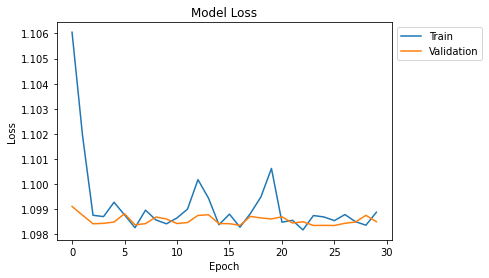

In [20]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

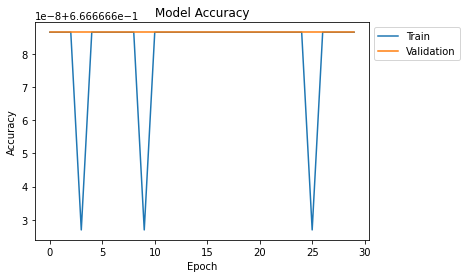

In [21]:
# Summarize history for loss

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

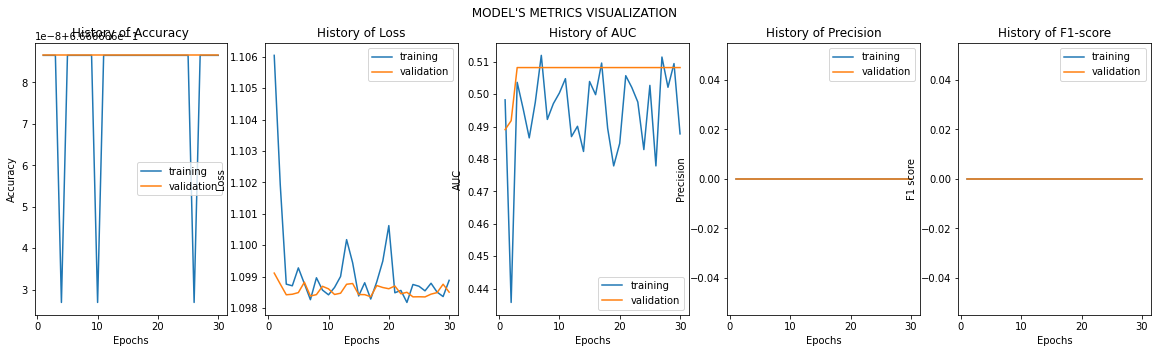

In [22]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(model_history.history['accuracy'],model_history.history['val_accuracy'],
               model_history.history['loss'],model_history.history['val_loss'],
               model_history.history['auc'],model_history.history['val_auc'],
               model_history.history['precision'],model_history.history['val_precision'],
               model_history.history['f1_score'],model_history.history['val_f1_score']
              )

In [ ]:
prediction= model.predict(val_generator, steps=np.ceil(val_generator.samples/val_generator.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=val_generator.classes

4/4 - 1s - 971ms/epoch - 243ms/step


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

print(classification_report(val_generator.classes, prediction))

ValueError: ignored